<a href="https://colab.research.google.com/github/TheTonyZhou/JSC270-A4/blob/main/Assignment_4_Part_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
api_key = 'k4yPuNFiTgwROrOSCD3Bdm7zq'

api_secret_key = 'fVFXJOEq7Cnlya6NY0gQVkqAnkAnfW0PqIDoBocqZQ5cO78cMc'

access_key =  '1507138918461976578-6VO5QanRTqtLp3CWoImY6FM7oV5Yjq'

access_secret = 'Eh4nw2AAaDt3MXtDNyv5PV4CElTjchsgBiDOIvwzfI75b'

bearer_token = 'AAAAAAAAAAAAAAAAAAAAAMXxagEAAAAAPSJckY7rlydPs0Y1O%2FVGSxlV0P0%3DuYoSAAPRVMNTXUVbXgp5VSsiqvS44jJ1Or8dg9d3IOCMQEXtvM'

In [ ]:
import csv
import pandas as pd
import seaborn as sns
import re
import nltk
from nltk.stem.porter import *
from nltk.corpus import stopwords
import numpy as np

In [ ]:
import tweepy as tw

# Use credentials to authorize access
auth = tw.auth.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_key, access_secret)

# essential v2
# auth = tw.Client(bearer_token, api_key, api_secret_key, access_key, access_secret)

api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
search_words = 'Amber Alert'
date_since = "2022-04-01"
date_until = "2022-04-02"

# Filter out duplicate search words
search_with_filter = search_words + " -filter:retweets"

tweets = tw.Cursor(api.search,
              q=search_with_filter,
              lang="en",
              since=date_since,
              until=date_until,
              tweet_mode='extended'
              ).items(2000)

# Open/create a file to append data to
csvFile = open('result_not_hashtag_20220401_full.csv', 'w')

#Use csv writer
csvWriter = csv.writer(csvFile)
csvWriter.writerow(['datetime', 'tweet'])
for tweet in tweets:
  # Write a row to the CSV file. I use encode UTF-8
  if 'retweeted_status' in tweet._json:
      msg = tweet._json['retweeted_status']['full_text']
  else:
      msg = tweet.full_text
  # print(msg)
  csvWriter.writerow([tweet.created_at, msg])
csvFile.close()

In [ ]:
# DEPRECIATED

# Open/create a file to append data to
# csvFile = open('result_not_hashtag.csv', 'a')

# #Use csv writer
# csvWriter = csv.writer(csvFile)

# for tweet in tweets:
#   # Write a row to the CSV file. I use encode UTF-8
#     csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])
# csvFile.close()

In [ ]:
# # Open/create a file to append data to
# csvFile = open('result2.csv', 'a')

# #Use csv writer
# csvWriter = csv.writer(csvFile)

In [ ]:
# # The result is an iterable
# for tweet in tweets:
#   # Write a row to the CSV file. I use encode UTF-8
#     csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])

In [ ]:
# csvFile.close()

In [ ]:
# from google.colab import files
# files.upload()



In [ ]:
# labelled_data = open('labelled_data.csv', 'r')
# csvReader = csv.reader(labelled_data)

# rows = []
# for row in csvReader:
#   rows.append(row)


In [ ]:
train_data = pd.read_csv('https://raw.githubusercontent.com/TheTonyZhou/JSC270-A4/main/Data/labelled_data.csv')

## Data Inspection

In [ ]:
train_data

,datetime,full_tweet,sentiment
0,25/3/2022 23:54,The Tennessee Bureau of Investigation has issu...,1
1,25/3/2022 23:53,TBI Issues Amber Alert for Franklin Child: htt...,1
2,25/3/2022 23:51,@TBInvestigation @FranklinTNPD Why did it take...,0
3,25/3/2022 23:47,���� AMBER Alert ���� | TBI has issued an AMBE...,1
4,25/3/2022 23:47,@TBInvestigation @FranklinTNPD I thought it wa...,0
...,...,...,...
1218,30/3/2022 21:32,@CityNewsVAN Why am I receiving an Amber Alert...,0
1219,30/3/2022 20:53,@CityNewsVAN People who complain about the Amb...,2
1220,1/4/2022 0:57,If you send a 200 decibel Amber Alert at 3am t...,2
1221,1/4/2022 1:36,STOP calling 911 to complain about Amber Alert...,2


In [ ]:
# Data inspection
print('Shape of training data: ' + str(train_data.shape))
print('Sentiment counts: (0 is negative, 1 is neutral, 2 is positive)')
train_data.sentiment.value_counts()

Shape of training data: (1223, 3)
Sentiment counts: (0 is negative, 1 is neutral, 2 is positive)


1    726
0    367
2    130
Name: sentiment, dtype: int64

In [ ]:
negative_count = len(train_data[(train_data.sentiment == 0)])
neutral_count = len(train_data[(train_data.sentiment == 1)])
positive_count = len(train_data[(train_data.sentiment == 2)])
total = negative_count + neutral_count + positive_count
positive_proportion = positive_count / total
negative_proportion = negative_count / total
neutral_proportion = neutral_count / total

print("positive proportion: {}".format(positive_proportion))
print("negative proportion: {}".format(negative_proportion))
print("netural proportion: {}".format(neutral_proportion))

positive proportion: 0.10629599345870809
negative proportion: 0.3000817661488144
netural proportion: 0.5936222403924775


In [ ]:
train_data.sentiment = train_data.sentiment.values.astype(str)

In [ ]:
train_data.dtypes

datetime      object
full_tweet    object
sentiment     object
dtype: object

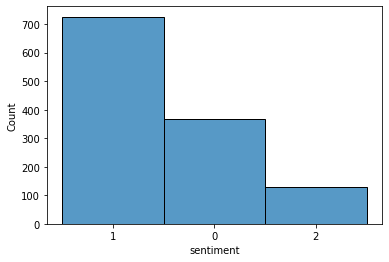

In [ ]:
sns.histplot(data=train_data, x='sentiment')

## Data Processing

In [ ]:
train_data['full_tweet_words_only'] = train_data['full_tweet']

In [ ]:
train_data

,datetime,full_tweet,sentiment,full_tweet_words_only
0,25/3/2022 23:54,The Tennessee Bureau of Investigation has issu...,1,The Tennessee Bureau of Investigation has issu...
1,25/3/2022 23:53,TBI Issues Amber Alert for Franklin Child: htt...,1,TBI Issues Amber Alert for Franklin Child: htt...
2,25/3/2022 23:51,@TBInvestigation @FranklinTNPD Why did it take...,0,@TBInvestigation @FranklinTNPD Why did it take...
3,25/3/2022 23:47,���� AMBER Alert ���� | TBI has issued an AMBE...,1,���� AMBER Alert ���� | TBI has issued an AMBE...
4,25/3/2022 23:47,@TBInvestigation @FranklinTNPD I thought it wa...,0,@TBInvestigation @FranklinTNPD I thought it wa...
...,...,...,...,...
1218,30/3/2022 21:32,@CityNewsVAN Why am I receiving an Amber Alert...,0,@CityNewsVAN Why am I receiving an Amber Alert...
1219,30/3/2022 20:53,@CityNewsVAN People who complain about the Amb...,2,@CityNewsVAN People who complain about the Amb...
1220,1/4/2022 0:57,If you send a 200 decibel Amber Alert at 3am t...,2,If you send a 200 decibel Amber Alert at 3am t...
1221,1/4/2022 1:36,STOP calling 911 to complain about Amber Alert...,2,STOP calling 911 to complain about Amber Alert...


### Removes replies (@user), URLs (https://...) and hashtags (#hashtag), and change to lowercase

In [ ]:
from pandas.core.common import temp_setattr
import re

patterns = ['http[^\s]*', '\@[A-Za-z0-9]*', '\#[A-Za-z0-9]*']

tweets_processed = []
for tweet in train_data.full_tweet_words_only:
  for pattern in patterns:
    tweet = re.sub(pattern, '', str(tweet))
  tweets_processed.append(tweet)
train_data.full_tweet_words_only = tweets_processed


train_data


,datetime,full_tweet,sentiment,full_tweet_words_only
0,25/3/2022 23:54,The Tennessee Bureau of Investigation has issu...,1,The Tennessee Bureau of Investigation has issu...
1,25/3/2022 23:53,TBI Issues Amber Alert for Franklin Child: htt...,1,TBI Issues Amber Alert for Franklin Child:
2,25/3/2022 23:51,@TBInvestigation @FranklinTNPD Why did it take...,0,Why did it take also a month to issue and Am...
3,25/3/2022 23:47,���� AMBER Alert ���� | TBI has issued an AMBE...,1,���� AMBER Alert ���� | TBI has issued an AMBE...
4,25/3/2022 23:47,@TBInvestigation @FranklinTNPD I thought it wa...,0,I thought it was a mistake because it had be...
...,...,...,...,...
1218,30/3/2022 21:32,@CityNewsVAN Why am I receiving an Amber Alert...,0,Why am I receiving an Amber Alert for somethi...
1219,30/3/2022 20:53,@CityNewsVAN People who complain about the Amb...,2,People who complain about the Amber alert are...
1220,1/4/2022 0:57,If you send a 200 decibel Amber Alert at 3am t...,2,If you send a 200 decibel Amber Alert at 3am t...
1221,1/4/2022 1:36,STOP calling 911 to complain about Amber Alert...,2,STOP calling 911 to complain about Amber Alert...


### Removes non-alphanumeric unicode characters, including punctuations

In [ ]:
import string 

train_data['full_tweet_alphanumeric'] = train_data['full_tweet_words_only']
puncts = '[' + str(string.punctuation) + ']'

tweets_alphanumeric = []
for tweet in train_data.full_tweet_alphanumeric:
  tweet = re.sub(puncts, ' ', str(tweet))
  tweet = re.sub('[^A-Za-z0-9\s]', '', str(tweet))

  tweet = tweet.lower()
  tweets_alphanumeric.append(tweet)
train_data.full_tweet_alphanumeric = tweets_alphanumeric

train_data

,datetime,full_tweet,sentiment,full_tweet_words_only,full_tweet_alphanumeric
0,25/3/2022 23:54,The Tennessee Bureau of Investigation has issu...,1,The Tennessee Bureau of Investigation has issu...,the tennessee bureau of investigation has issu...
1,25/3/2022 23:53,TBI Issues Amber Alert for Franklin Child: htt...,1,TBI Issues Amber Alert for Franklin Child:,tbi issues amber alert for franklin child
2,25/3/2022 23:51,@TBInvestigation @FranklinTNPD Why did it take...,0,Why did it take also a month to issue and Am...,why did it take also a month to issue and am...
3,25/3/2022 23:47,���� AMBER Alert ���� | TBI has issued an AMBE...,1,���� AMBER Alert ���� | TBI has issued an AMBE...,amber alert tbi has issued an amber alert ...
4,25/3/2022 23:47,@TBInvestigation @FranklinTNPD I thought it wa...,0,I thought it was a mistake because it had be...,i thought it was a mistake because it had be...
...,...,...,...,...,...
1218,30/3/2022 21:32,@CityNewsVAN Why am I receiving an Amber Alert...,0,Why am I receiving an Amber Alert for somethi...,why am i receiving an amber alert for somethi...
1219,30/3/2022 20:53,@CityNewsVAN People who complain about the Amb...,2,People who complain about the Amber alert are...,people who complain about the amber alert are...
1220,1/4/2022 0:57,If you send a 200 decibel Amber Alert at 3am t...,2,If you send a 200 decibel Amber Alert at 3am t...,if you send a 200 decibel amber alert at 3am t...
1221,1/4/2022 1:36,STOP calling 911 to complain about Amber Alert...,2,STOP calling 911 to complain about Amber Alert...,stop calling 911 to complain about amber alert...


### Tokenize the processed tweets

In [ ]:
train_data['tokens'] = train_data['full_tweet_alphanumeric'].str.split()
train_data

,datetime,full_tweet,sentiment,full_tweet_words_only,full_tweet_alphanumeric,tokens
0,25/3/2022 23:54,The Tennessee Bureau of Investigation has issu...,1,The Tennessee Bureau of Investigation has issu...,the tennessee bureau of investigation has issu...,"[the, tennessee, bureau, of, investigation, ha..."
1,25/3/2022 23:53,TBI Issues Amber Alert for Franklin Child: htt...,1,TBI Issues Amber Alert for Franklin Child:,tbi issues amber alert for franklin child,"[tbi, issues, amber, alert, for, franklin, child]"
2,25/3/2022 23:51,@TBInvestigation @FranklinTNPD Why did it take...,0,Why did it take also a month to issue and Am...,why did it take also a month to issue and am...,"[why, did, it, take, also, a, month, to, issue..."
3,25/3/2022 23:47,���� AMBER Alert ���� | TBI has issued an AMBE...,1,���� AMBER Alert ���� | TBI has issued an AMBE...,amber alert tbi has issued an amber alert ...,"[amber, alert, tbi, has, issued, an, amber, al..."
4,25/3/2022 23:47,@TBInvestigation @FranklinTNPD I thought it wa...,0,I thought it was a mistake because it had be...,i thought it was a mistake because it had be...,"[i, thought, it, was, a, mistake, because, it,..."
...,...,...,...,...,...,...
1218,30/3/2022 21:32,@CityNewsVAN Why am I receiving an Amber Alert...,0,Why am I receiving an Amber Alert for somethi...,why am i receiving an amber alert for somethi...,"[why, am, i, receiving, an, amber, alert, for,..."
1219,30/3/2022 20:53,@CityNewsVAN People who complain about the Amb...,2,People who complain about the Amber alert are...,people who complain about the amber alert are...,"[people, who, complain, about, the, amber, ale..."
1220,1/4/2022 0:57,If you send a 200 decibel Amber Alert at 3am t...,2,If you send a 200 decibel Amber Alert at 3am t...,if you send a 200 decibel amber alert at 3am t...,"[if, you, send, a, 200, decibel, amber, alert,..."
1221,1/4/2022 1:36,STOP calling 911 to complain about Amber Alert...,2,STOP calling 911 to complain about Amber Alert...,stop calling 911 to complain about amber alert...,"[stop, calling, 911, to, complain, about, ambe..."


### Remove stopwords

In [ ]:
nltk.download('stopwords')
sw = stopwords.words('english')[:200]

new_tokens = []
for row in train_data['tokens']:
  new_row = []
  for item in row:
    if item not in sw:
      new_row.append(item)
  new_tokens.append(new_row)

train_data['tokens_no_sw'] = new_tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
train_data

,datetime,full_tweet,sentiment,full_tweet_words_only,full_tweet_alphanumeric,tokens,tokens_no_sw
0,25/3/2022 23:54,The Tennessee Bureau of Investigation has issu...,1,The Tennessee Bureau of Investigation has issu...,the tennessee bureau of investigation has issu...,"[the, tennessee, bureau, of, investigation, ha...","[tennessee, bureau, investigation, issued, amb..."
1,25/3/2022 23:53,TBI Issues Amber Alert for Franklin Child: htt...,1,TBI Issues Amber Alert for Franklin Child:,tbi issues amber alert for franklin child,"[tbi, issues, amber, alert, for, franklin, child]","[tbi, issues, amber, alert, franklin, child]"
2,25/3/2022 23:51,@TBInvestigation @FranklinTNPD Why did it take...,0,Why did it take also a month to issue and Am...,why did it take also a month to issue and am...,"[why, did, it, take, also, a, month, to, issue...","[take, also, month, issue, amber, alert, duh, ..."
3,25/3/2022 23:47,���� AMBER Alert ���� | TBI has issued an AMBE...,1,���� AMBER Alert ���� | TBI has issued an AMBE...,amber alert tbi has issued an amber alert ...,"[amber, alert, tbi, has, issued, an, amber, al...","[amber, alert, tbi, issued, amber, alert, one,..."
4,25/3/2022 23:47,@TBInvestigation @FranklinTNPD I thought it wa...,0,I thought it was a mistake because it had be...,i thought it was a mistake because it had be...,"[i, thought, it, was, a, mistake, because, it,...","[thought, mistake, long, race, related, said, ..."
...,...,...,...,...,...,...,...
1218,30/3/2022 21:32,@CityNewsVAN Why am I receiving an Amber Alert...,0,Why am I receiving an Amber Alert for somethi...,why am i receiving an amber alert for somethi...,"[why, am, i, receiving, an, amber, alert, for,...","[receiving, amber, alert, something, 1k, km, a..."
1219,30/3/2022 20:53,@CityNewsVAN People who complain about the Amb...,2,People who complain about the Amber alert are...,people who complain about the amber alert are...,"[people, who, complain, about, the, amber, ale...","[people, complain, amber, alert, people, compl..."
1220,1/4/2022 0:57,If you send a 200 decibel Amber Alert at 3am t...,2,If you send a 200 decibel Amber Alert at 3am t...,if you send a 200 decibel amber alert at 3am t...,"[if, you, send, a, 200, decibel, amber, alert,...","[send, 200, decibel, amber, alert, 3am, wakes,..."
1221,1/4/2022 1:36,STOP calling 911 to complain about Amber Alert...,2,STOP calling 911 to complain about Amber Alert...,stop calling 911 to complain about amber alert...,"[stop, calling, 911, to, complain, about, ambe...","[stop, calling, 911, complain, amber, alerts, ..."


### Stem the tokens

In [ ]:
#### Stemming tokens ####
stemmer = PorterStemmer()
stemmed_tokens = []

for row in train_data['tokens_no_sw']:
  stemmed_row = []
  for item in row:
    token_stems = stemmer.stem(item)
    stemmed_row.append(token_stems)
  stemmed_tokens.append(stemmed_row)

train_data['tokens_stemmed'] = stemmed_tokens

In [ ]:
train_data

,datetime,full_tweet,sentiment,full_tweet_words_only,full_tweet_alphanumeric,tokens,tokens_no_sw,tokens_stemmed
0,25/3/2022 23:54,The Tennessee Bureau of Investigation has issu...,1,The Tennessee Bureau of Investigation has issu...,the tennessee bureau of investigation has issu...,"[the, tennessee, bureau, of, investigation, ha...","[tennessee, bureau, investigation, issued, amb...","[tennesse, bureau, investig, issu, amber, aler..."
1,25/3/2022 23:53,TBI Issues Amber Alert for Franklin Child: htt...,1,TBI Issues Amber Alert for Franklin Child:,tbi issues amber alert for franklin child,"[tbi, issues, amber, alert, for, franklin, child]","[tbi, issues, amber, alert, franklin, child]","[tbi, issu, amber, alert, franklin, child]"
2,25/3/2022 23:51,@TBInvestigation @FranklinTNPD Why did it take...,0,Why did it take also a month to issue and Am...,why did it take also a month to issue and am...,"[why, did, it, take, also, a, month, to, issue...","[take, also, month, issue, amber, alert, duh, ...","[take, also, month, issu, amber, alert, duh, m..."
3,25/3/2022 23:47,���� AMBER Alert ���� | TBI has issued an AMBE...,1,���� AMBER Alert ���� | TBI has issued an AMBE...,amber alert tbi has issued an amber alert ...,"[amber, alert, tbi, has, issued, an, amber, al...","[amber, alert, tbi, issued, amber, alert, one,...","[amber, alert, tbi, issu, amber, alert, one, y..."
4,25/3/2022 23:47,@TBInvestigation @FranklinTNPD I thought it wa...,0,I thought it was a mistake because it had be...,i thought it was a mistake because it had be...,"[i, thought, it, was, a, mistake, because, it,...","[thought, mistake, long, race, related, said, ...","[thought, mistak, long, race, relat, said, des..."
...,...,...,...,...,...,...,...,...
1218,30/3/2022 21:32,@CityNewsVAN Why am I receiving an Amber Alert...,0,Why am I receiving an Amber Alert for somethi...,why am i receiving an amber alert for somethi...,"[why, am, i, receiving, an, amber, alert, for,...","[receiving, amber, alert, something, 1k, km, a...","[receiv, amber, alert, someth, 1k, km, away, r..."
1219,30/3/2022 20:53,@CityNewsVAN People who complain about the Amb...,2,People who complain about the Amber alert are...,people who complain about the amber alert are...,"[people, who, complain, about, the, amber, ale...","[people, complain, amber, alert, people, compl...","[peopl, complain, amber, alert, peopl, complai..."
1220,1/4/2022 0:57,If you send a 200 decibel Amber Alert at 3am t...,2,If you send a 200 decibel Amber Alert at 3am t...,if you send a 200 decibel amber alert at 3am t...,"[if, you, send, a, 200, decibel, amber, alert,...","[send, 200, decibel, amber, alert, 3am, wakes,...","[send, 200, decibel, amber, alert, 3am, wake, ..."
1221,1/4/2022 1:36,STOP calling 911 to complain about Amber Alert...,2,STOP calling 911 to complain about Amber Alert...,stop calling 911 to complain about amber alert...,"[stop, calling, 911, to, complain, about, ambe...","[stop, calling, 911, complain, amber, alerts, ...","[stop, call, 911, complain, amber, alert, chil..."


### Lemmatize the tokens

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

lemma_tokens = []

for row in train_data['tokens_no_sw']:
  lemma_row = []
  for item in row:
    lemma_token = lemmatizer.lemmatize(item)
    lemma_row.append(lemma_token)
  lemma_tokens.append(lemma_row)

train_data['lemma_tokens'] = lemma_tokens

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
train_data

,datetime,full_tweet,sentiment,full_tweet_words_only,full_tweet_alphanumeric,tokens,tokens_no_sw,tokens_stemmed,lemma_tokens
0,25/3/2022 23:54,The Tennessee Bureau of Investigation has issu...,1,The Tennessee Bureau of Investigation has issu...,the tennessee bureau of investigation has issu...,"[the, tennessee, bureau, of, investigation, ha...","[tennessee, bureau, investigation, issued, amb...","[tennesse, bureau, investig, issu, amber, aler...","[tennessee, bureau, investigation, issued, amb..."
1,25/3/2022 23:53,TBI Issues Amber Alert for Franklin Child: htt...,1,TBI Issues Amber Alert for Franklin Child:,tbi issues amber alert for franklin child,"[tbi, issues, amber, alert, for, franklin, child]","[tbi, issues, amber, alert, franklin, child]","[tbi, issu, amber, alert, franklin, child]","[tbi, issue, amber, alert, franklin, child]"
2,25/3/2022 23:51,@TBInvestigation @FranklinTNPD Why did it take...,0,Why did it take also a month to issue and Am...,why did it take also a month to issue and am...,"[why, did, it, take, also, a, month, to, issue...","[take, also, month, issue, amber, alert, duh, ...","[take, also, month, issu, amber, alert, duh, m...","[take, also, month, issue, amber, alert, duh, ..."
3,25/3/2022 23:47,���� AMBER Alert ���� | TBI has issued an AMBE...,1,���� AMBER Alert ���� | TBI has issued an AMBE...,amber alert tbi has issued an amber alert ...,"[amber, alert, tbi, has, issued, an, amber, al...","[amber, alert, tbi, issued, amber, alert, one,...","[amber, alert, tbi, issu, amber, alert, one, y...","[amber, alert, tbi, issued, amber, alert, one,..."
4,25/3/2022 23:47,@TBInvestigation @FranklinTNPD I thought it wa...,0,I thought it was a mistake because it had be...,i thought it was a mistake because it had be...,"[i, thought, it, was, a, mistake, because, it,...","[thought, mistake, long, race, related, said, ...","[thought, mistak, long, race, relat, said, des...","[thought, mistake, long, race, related, said, ..."
...,...,...,...,...,...,...,...,...,...
1218,30/3/2022 21:32,@CityNewsVAN Why am I receiving an Amber Alert...,0,Why am I receiving an Amber Alert for somethi...,why am i receiving an amber alert for somethi...,"[why, am, i, receiving, an, amber, alert, for,...","[receiving, amber, alert, something, 1k, km, a...","[receiv, amber, alert, someth, 1k, km, away, r...","[receiving, amber, alert, something, 1k, km, a..."
1219,30/3/2022 20:53,@CityNewsVAN People who complain about the Amb...,2,People who complain about the Amber alert are...,people who complain about the amber alert are...,"[people, who, complain, about, the, amber, ale...","[people, complain, amber, alert, people, compl...","[peopl, complain, amber, alert, peopl, complai...","[people, complain, amber, alert, people, compl..."
1220,1/4/2022 0:57,If you send a 200 decibel Amber Alert at 3am t...,2,If you send a 200 decibel Amber Alert at 3am t...,if you send a 200 decibel amber alert at 3am t...,"[if, you, send, a, 200, decibel, amber, alert,...","[send, 200, decibel, amber, alert, 3am, wakes,...","[send, 200, decibel, amber, alert, 3am, wake, ...","[send, 200, decibel, amber, alert, 3am, wake, ..."
1221,1/4/2022 1:36,STOP calling 911 to complain about Amber Alert...,2,STOP calling 911 to complain about Amber Alert...,stop calling 911 to complain about amber alert...,"[stop, calling, 911, to, complain, about, ambe...","[stop, calling, 911, complain, amber, alerts, ...","[stop, call, 911, complain, amber, alert, chil...","[stop, calling, 911, complain, amber, alert, c..."


## Naive Bayes Model

### Using stemmed tokens

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
X_stemmed, y_stemmed = train_data['tokens_stemmed'].to_numpy(), train_data['sentiment'].to_numpy()

def override_fcn(doc):
  # We expect a list of tokens as input
  return doc

count_vec = TfidfVectorizer(
    analyzer='word',
    tokenizer= override_fcn,
    preprocessor= override_fcn,
    token_pattern= None,
    max_features = 2000)

stemmed_counts = count_vec.fit_transform(X_stemmed)
print(stemmed_counts.toarray())
stemmed_counts_arr = stemmed_counts.toarray()

print(count_vec.vocabulary_)
len(count_vec.vocabulary_)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{'tennesse': 1714, 'bureau': 342, 'investig': 889, 'issu': 894, 'amber': 176, 'alert': 159, 'miss': 1089, 'one': 1201, 'year': 1979, 'old': 1195, 'child': 405, 'franklin': 767, 'tbi': 1702, 'take': 1695, 'also': 170, 'month': 1101, 'duh': 637, 'what': 1919, 'gone': 796, 'sinc': 1567, 'februari': 736, '27th': 55, 'agent': 145, 'believ': 277, 'aziah': 247, 'lumpkin': 1015, 'may': 1049, 'non': 1157, 'custodi': 524, 'father': 732, 'sharl': 1540, 'thought': 1736, 'mistak': 1092, 'long': 1000, 'race': 1363, 'relat': 1407, 'said': 1476, 'descript': 574, 'tnpd': 1755, 'request': 1419, 'assist': 226, 'today': 1756, 'tn': 1754, 'look': 1002, 'previou': 1319, 'made': 1021, 'white': 1925, 'children': 407, 'post': 1299, 'within': 1946, 'day': 545, 'yet': 1983, 'took': 1764, 'black': 293, 'babi': 250, 'boy': 314, 'racial': 1364, 'injustic': 880, 

2000

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and test sets

X_stemmed_train, X_stemmed_test, y_stemmed_train, y_stemmed_test = train_test_split(stemmed_counts_arr, y_stemmed, test_size = 0.2, random_state = 42)

# First three rows of training features and labels
print('First 3 features:\n',X_stemmed_train[:3])
print('First 3 labels:\n',y_stemmed_train[:3])

First 3 features:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
First 3 labels:
 ['1' '0' '1']


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, roc_curve
import matplotlib.pyplot as plt

# Let's fit the Naive Bayes model to our training data
nb = MultinomialNB()
# Fit model to training data
nb.fit(X_stemmed_train, y_stemmed_train)
# Predict on test data
y_stemmed_preds = nb.predict(X_stemmed_test)

print('Train accuracy with simple Naive Bayes:',accuracy_score(y_stemmed_train,nb.predict(X_stemmed_train)))
print('Test accuracy with simple Naive Bayes:',accuracy_score(y_stemmed_test,y_stemmed_preds))

Train accuracy with simple Naive Bayes: 0.8374233128834356
Test accuracy with simple Naive Bayes: 0.746938775510204


### Using lemmatized tokens

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

X_lemma, y_lemma = train_data['lemma_tokens'].to_numpy(), train_data['sentiment'].to_numpy()

test_count_vec = CountVectorizer(
    analyzer='word',
    tokenizer= override_fcn,
    preprocessor= override_fcn,
    token_pattern= None,
    max_features = 2000)

lemma_counts = count_vec.fit_transform(X_lemma)

print(stemmed_counts.toarray())
lemma_counts_arr = stemmed_counts.toarray()

print(count_vec.vocabulary_)
len(count_vec.vocabulary_)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{'tennessee': 1678, 'bureau': 330, 'investigation': 913, 'issued': 919, 'amber': 192, 'alert': 173, 'missing': 1038, 'one': 1101, 'year': 1980, 'old': 1098, 'child': 388, 'franklin': 781, 'tbi': 1664, 'issue': 918, 'take': 1656, 'also': 186, 'month': 1045, 'duh': 654, 'whats': 1917, 'gone': 815, 'since': 1513, 'february': 749, '27th': 56, 'agent': 158, 'believe': 266, 'aziah': 249, 'lumpkin': 999, 'may': 1016, 'non': 1074, 'custodial': 524, 'father': 745, 'sharles': 1486, 'thought': 1706, 'long': 988, 'race': 1261, 'related': 1315, 'said': 1402, 'description': 580, 'tnpd': 1727, 'requested': 1335, 'tbis': 1665, 'assistance': 238, 'today': 1728, 'tn': 1726, 'previous': 1212, 'made': 1001, 'white': 1922, 'posted': 1188, 'within': 1945, 'day': 548, 'yet': 1984, 'took': 1736, 'post': 1187, 'black': 277, 'baby': 251, 'boy': 301, 'racial'

2000

In [ ]:
X_lemma_train, X_lemma_test, y_lemma_train, y_lemma_test = train_test_split(lemma_counts_arr, y_lemma, test_size = 0.2, random_state = 42)

# First three rows of training features and labels
print('First 3 features:\n',X_lemma_train[:3])
print('First 3 labels:\n',y_lemma_train[:3])

First 3 features:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
First 3 labels:
 ['1' '0' '1']


In [ ]:
# Let's fit the Naive Bayes model to our training data
# Fit model to training data
nb.fit(X_lemma_train, y_lemma_train)
# Predict on test data
y_lemma_preds = nb.predict(X_lemma_test)

print('Train accuracy with simple Naive Bayes:',accuracy_score(y_lemma_train,nb.predict(X_lemma_train)))
print('Test accuracy with simple Naive Bayes:',accuracy_score(y_lemma_test,y_lemma_preds))

Train accuracy with simple Naive Bayes: 0.8374233128834356
Test accuracy with simple Naive Bayes: 0.746938775510204


## Multiclass Logistic Regression

### Using stemmed tokens

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_stemmed_train, y_stemmed_train)
logreg_pred_stemmed = logreg.predict(X_stemmed_test)

In [ ]:
print('Train accuracy with multiclass logistic regression:',accuracy_score(y_stemmed_train,logreg.predict(X_stemmed_train)))
print('Test accuracy with multiclass logistic regression:',accuracy_score(y_stemmed_test,logreg_pred_stemmed))

Train accuracy with multiclass logistic regression: 0.8977505112474438
Test accuracy with multiclass logistic regression: 0.7387755102040816


### Using lemmatized tokens

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_lemma_train, y_lemma_train)
logreg_pred_lemma = logreg.predict(X_lemma_test)

In [ ]:
print('Train accuracy with multiclass logistic regression:',accuracy_score(y_lemma_train,logreg.predict(X_lemma_train)))
print('Test accuracy with multiclass logistic regression:',accuracy_score(y_lemma_test,logreg_pred_lemma))

Train accuracy with multiclass logistic regression: 0.8977505112474438
Test accuracy with multiclass logistic regression: 0.7387755102040816
